In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
tasmania_df = pd.read_csv('Data_sets/Tasmania_Data.csv')

tasmania_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

tasmania_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,300.331259,294.455437,289.068078,263.390922,307.689304,246.710611,278.578414,286.572733,276.478777,299.829485,...,232384.032157,235201.115988,239331.980809,235166.818700,234747.206701,233791.508560,235309.867518,238325.284397,236812.339489,3.760137e+06
std,191.472836,178.335205,180.894084,181.188277,192.544141,182.996380,182.148957,169.950718,179.503460,185.270575,...,28444.508021,29020.010182,28813.597754,28734.266364,28698.333219,28353.824899,28499.047384,28693.896083,28045.062638,1.121468e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,129775.910100,138563.996300,126897.265500,133149.911400,128318.157900,131102.363200,134838.948900,135212.637500,128026.083200,3.235131e+06
25%,121.018450,137.408200,126.749450,104.923150,125.933750,75.863550,114.667200,143.875200,122.936800,132.516950,...,211195.652300,213104.070250,217771.899300,213165.867300,212845.069300,211829.765600,213769.697250,217257.203450,216086.683250,3.685864e+06
50%,316.563000,303.411200,301.648600,244.302900,336.152100,223.478000,264.081200,297.630900,261.175200,314.031600,...,233919.772500,236768.550900,245712.105300,237440.955600,237238.103100,236435.082900,237550.646600,242743.462400,240613.970700,3.755821e+06
75%,479.759200,447.732650,446.489050,427.197650,484.349750,407.300150,451.788550,420.964250,442.217600,471.066950,...,259325.849450,265307.623000,265738.647500,264954.456350,263739.954800,261343.416800,264541.812850,265748.753650,265161.691500,3.830820e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,282143.804400,279824.753000,283548.559400,281457.365400,281789.422200,281968.795200,286279.149600,282189.733800,283875.584200,4.241838e+06


In [3]:
nan_counts = tasmania_df.isna().sum()
print(nan_counts)



X1           0
X2           0
X3           0
X4           0
X5           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X14          0
X15          0
X16          0
Y1           0
Y2           0
Y3           0
Y4           0
Y5           0
Y6           0
Y7           0
Y8           0
Y9           0
Y10          0
Y11          0
Y12          0
Y13          0
Y14          0
Y15          0
Y16          0
P1           0
P2           0
P3           0
P4           0
P5           0
P6           0
P7           0
P8           0
P9           0
P10          0
P11          0
P12          0
P13          0
P14          0
P15          0
P16          0
Power_all    0
dtype: int64


In [4]:
columns_to_remove = [f"P{i}" for i in range(1, 17)]
tasmania_df = tasmania_df.drop(columns=columns_to_remove, errors='ignore')

<Axes: >

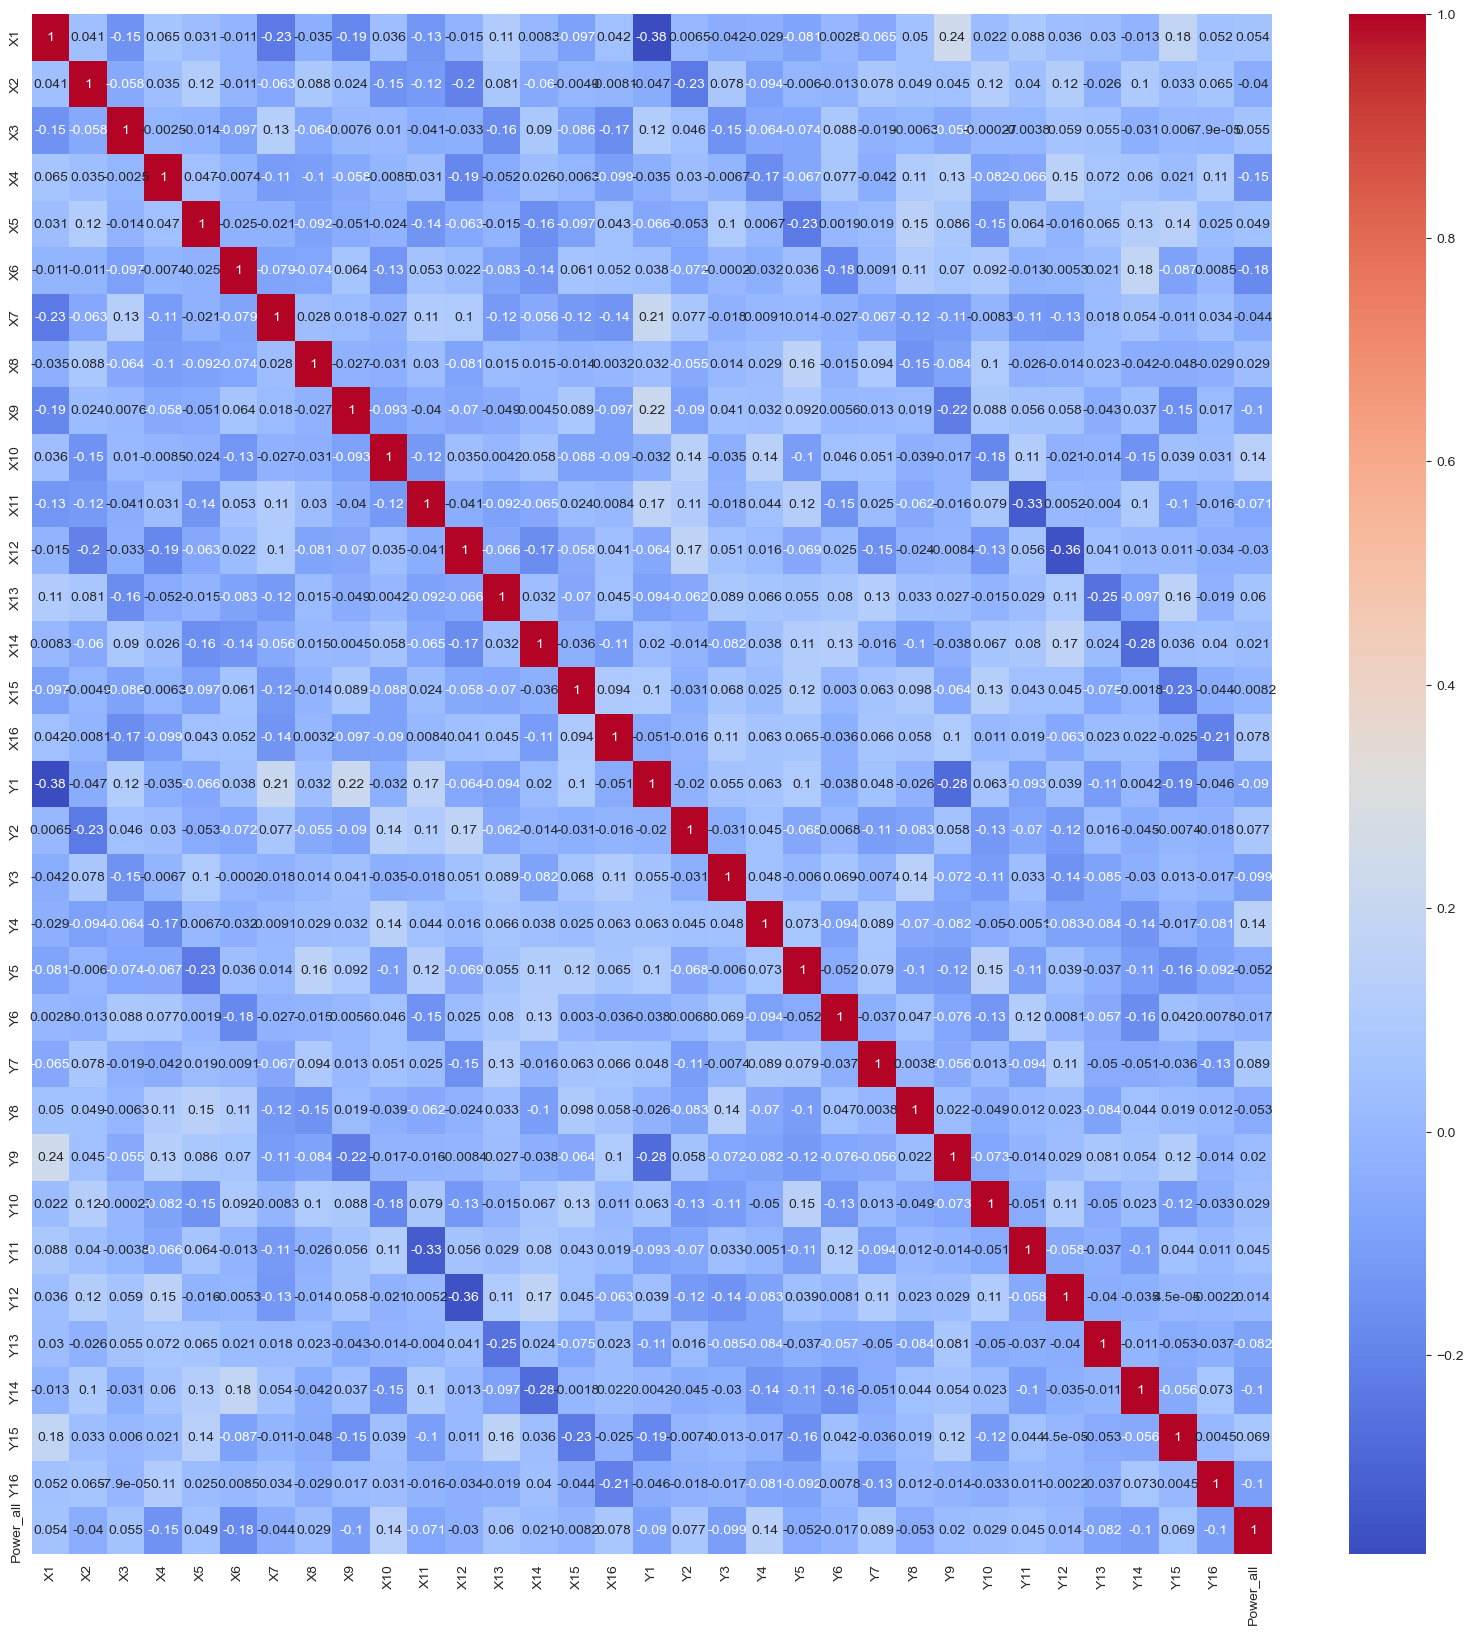

In [5]:
correlation_matrix = tasmania_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)


In [6]:


#tasmania_df = tasmania_df.drop(columns=['Y1',"Y11","Y12",'Y13','Y14','X1','X11','X12','X13','X14'])

available_columns = tasmania_df.columns
print(available_columns)

# Lista kolumn, które chcesz wybrać
x_columns = [f"X{i}" for i in range(1, 17)]
y_columns = [f"Y{i}" for i in range(1, 17)]

# Filtrujemy dostępne kolumny
x_columns_existing = [col for col in x_columns if col in available_columns]
y_columns_existing = [col for col in y_columns if col in available_columns]

# Łączymy kolumny X i Y, które istnieją w DataFrame
#X = tasmania_df[x_columns_existing + y_columns_existing]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
       'Power_all'],
      dtype='object')


In [7]:

X = tasmania_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = tasmania_df["Power_all"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE
mse_lr, rmse_lr = calculate_rmse(y_val, y_val_pred_lr)

# Obliczanie współczynnika determinacji R²
r2_lr = lr.score(X_val, y_val)  # R² dla modelu

# Wyświetlanie wyników
print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")

# Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Fitting the model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
y_val_pred_poly = poly_reg_model.predict(X_val_poly)

# Calculating MSE, RMSE
mse_poly, rmse_poly = calculate_rmse(y_val, y_val_pred_poly)

# Calculating R² for Polynomial Regression
r2_poly = poly_reg_model.score(X_val_poly, y_val)

# Displaying results for Polynomial Regression
print(f"Polynomial Regression (Degree 3) - MSE: {mse_poly}, RMSE: {rmse_poly}, R²: {r2_poly}")


Linear Regression - MSE: 10742938951.982664, RMSE: 103648.14977597364, R²: 0.15207049460591449
Polynomial Regression (Degree 3) - MSE: 3185261169.5763903, RMSE: 56438.11805487839, R²: 0.7485904983597218


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.11, max_depth=10, random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)

# Predykcja na danych testowych
y_pred = model.predict(X_test)

# Obliczanie MSE i RMSE
mse = mean_squared_error(y_test, y_pred)
rmse_xboost = np.sqrt(mse)

# Obliczanie współczynnika determinacji R²
r2_xboost = r2_score(y_test, y_pred)

print(f"XGBoost - MSE: {mse}, RMSE: {rmse_xboost}, R²: {r2_xboost}")


XGBoost - MSE: 2678419274.7840405, RMSE: 51753.44698456365, R²: 0.785597151039176


In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Funkcja do obliczania MSE i RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model: AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)

# Predykcja na danych walidacyjnych
y_val_pred_ab = model.predict(X_test)

# Obliczanie MSE, RMSE
mse_ab, rmse_ab = calculate_rmse(y_val, y_val_pred_ab)

# Obliczanie współczynnika determinacji R²
r2_ab = model.score(X_val, y_val)  # R² dla modelu

# Wyświetlanie wyników
print(f"AdaBoost Regressor - MSE: {mse_ab}, RMSE: {rmse_ab}, R²: {r2_ab}")


AdaBoost Regressor - MSE: 18832315374.44905, RMSE: 137230.88345721984, R²: 0.2965496793524445


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(n_estimators=50, max_depth=10, random_state=42)

# Cross-validation z MSE
mse_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_gb = np.sqrt(-mse_scores.mean())
print("Średni błąd MSE dla GradientBoosting:", -mse_scores.mean())
print("Średni błąd RMSE dla GradientBoosting:", np.sqrt(-mse_scores.mean()))

# Cross-validation z R²
r2_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
print("Średni współczynnik determinacji R² dla GradientBoosting:", r2_scores.mean())


Średni błąd MSE dla GradientBoosting: 3572814963.335325
Średni błąd RMSE dla GradientBoosting: 59773.0287281423
Średni współczynnik determinacji R² dla GradientBoosting: 0.715860954027904


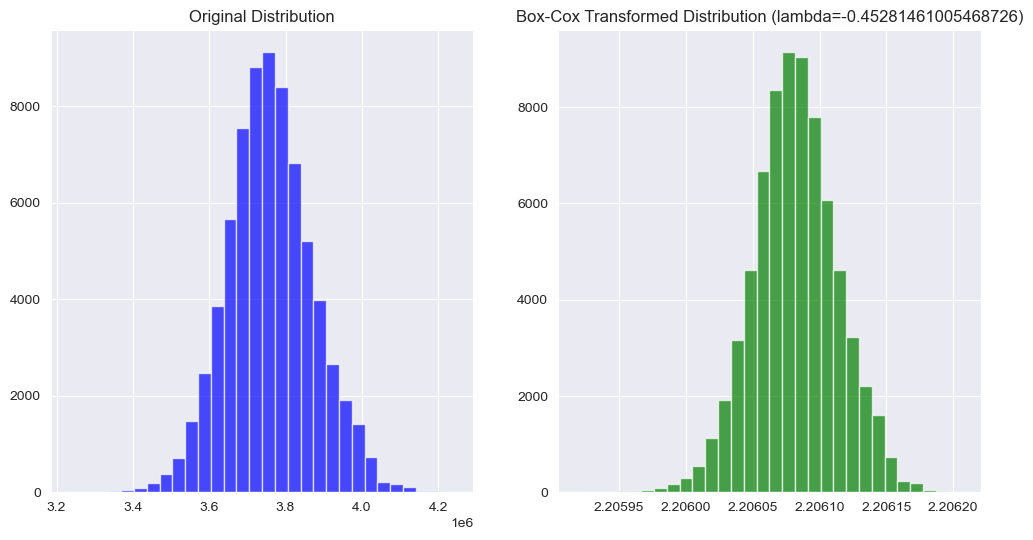

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Załóżmy, że masz dane w DataFrame
# przykładowe dane - dla tego przykładu zakładamy, że mamy dane w kolumnie 'P1'


# Box-Cox wymaga, aby wszystkie dane były dodatnie
# Sprawdzamy, czy wszystkie wartości w kolumnie 'P1' są większe od 0
if (tasmania_df['Power_all'] > 0).all():
    transformed_data, lambda_ = boxcox(tasmania_df['Power_all'])
    tasmania_df['Power_all_boxcox'] = transformed_data

    # Przed i po Box-Cox
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(tasmania_df['Power_all'], bins=30, color='blue', alpha=0.7)
    plt.title("Original Distribution")

    plt.subplot(1, 2, 2)
    plt.hist(tasmania_df['Power_all_boxcox'], bins=30, color='green', alpha=0.7)
    plt.title(f"Box-Cox Transformed Distribution (lambda={lambda_})")
    plt.show()
else:
    print("Wszystkie wartości muszą być większe od zera.")


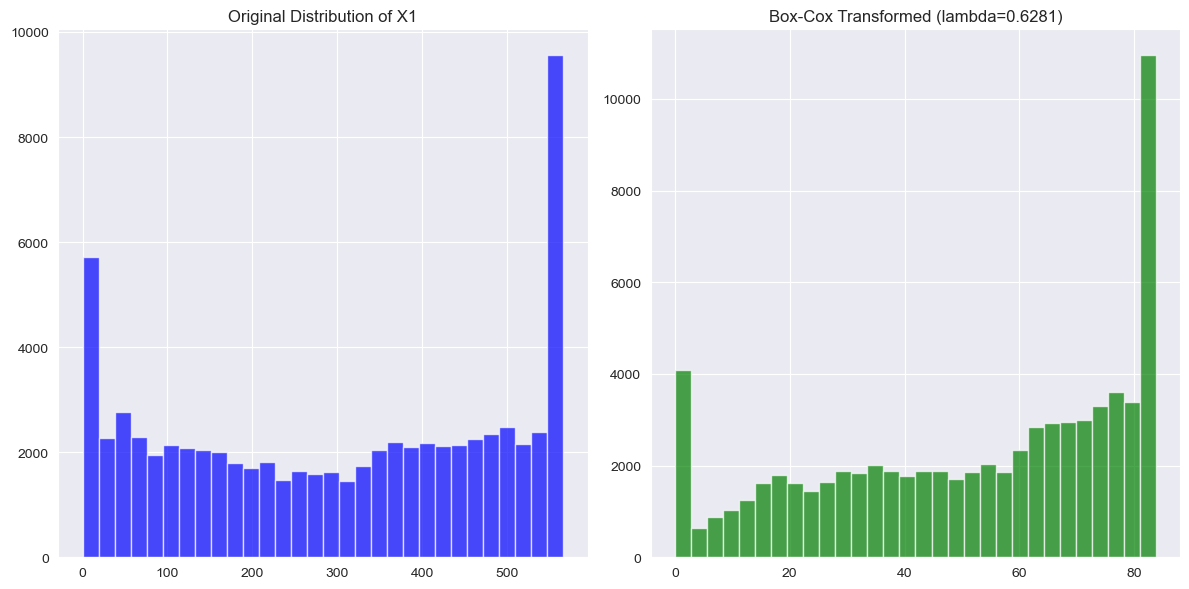

Dane zostały przesunięte o wartość: 1.0.


In [13]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Zakładamy, że dane są w DataFrame tasmania_df, w kolumnie 'X1'
column = 'X1'

# Sprawdzanie minimalnej wartości i przesunięcie danych
min_value = tasmania_df[column].min()
if min_value <= 0:
    shift = 1 - min_value
    tasmania_df[f'{column}_shifted'] = tasmania_df[column] + shift  # Dodanie stałej
else:
    shift = 0  # Nie trzeba przesuwać, jeśli wszystkie wartości są dodatnie
    tasmania_df[f'{column}_shifted'] = tasmania_df[column]

# Transformacja Box-Cox (teraz na przesuniętych danych)
transformed_data, lambda_ = boxcox(tasmania_df[f'{column}_shifted'])
tasmania_df[f'{column}_boxcox'] = transformed_data

# Wizualizacja przed i po transformacji
plt.figure(figsize=(12, 6))

# Histogram oryginalnych danych
plt.subplot(1, 2, 1)
plt.hist(tasmania_df[column], bins=30, color='blue', alpha=0.7)
plt.title(f"Original Distribution of {column}")

# Histogram danych po transformacji Box-Cox
plt.subplot(1, 2, 2)
plt.hist(tasmania_df[f'{column}_boxcox'], bins=30, color='green', alpha=0.7)
plt.title(f"Box-Cox Transformed (lambda={lambda_:.4f})")

plt.tight_layout()
plt.show()

# Informacja o przesunięciu
if shift > 0:
    print(f"Dane zostały przesunięte o wartość: {shift}.")
else:
    print("Dane były już dodatnie, przesunięcie nie było potrzebne.")


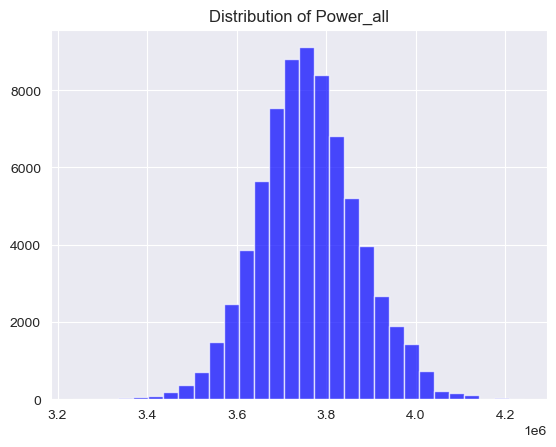

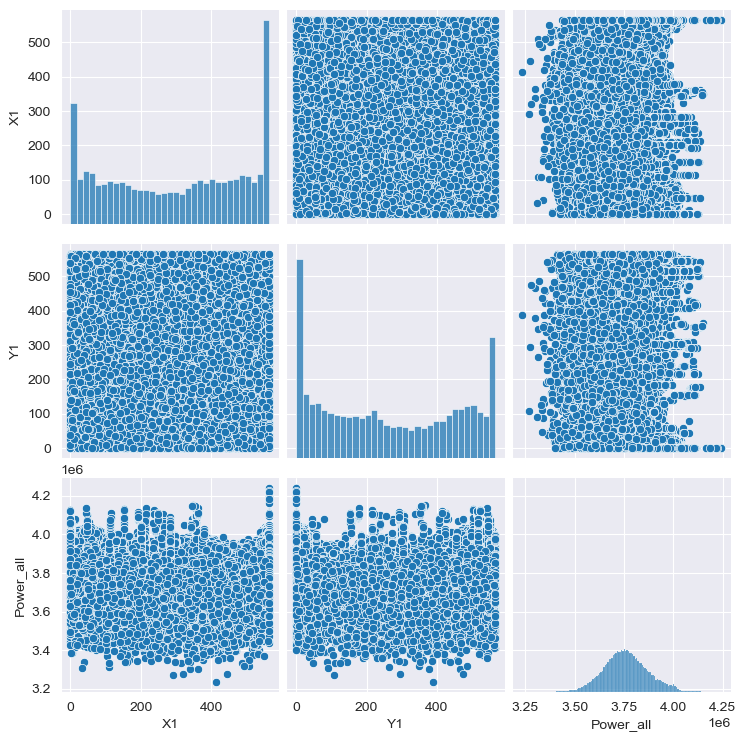

Lambda for Box-Cox: -0.45281461005468726


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych


# Histogram dla Power_all
plt.hist(tasmania_df['Power_all'], bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Power_all")
plt.show()

# Sprawdzenie zależności X, Y -> Power_all
sns.pairplot(tasmania_df, vars=['X1', 'Y1', 'Power_all'])
plt.show()

# Box-Cox dla Power_all (jeśli dane są dodatnie)
from scipy.stats import boxcox

if (tasmania_df['Power_all'] > 0).all():
    transformed, lambda_ = boxcox(tasmania_df['Power_all'])
    print(f"Lambda for Box-Cox: {lambda_}")
else:
    print("Power_all contains non-positive values, consider shifting the data.")


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'P1',
       'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12',
       'P13', 'P14', 'P15', 'P16', 'Power_all'],
      dtype='object')


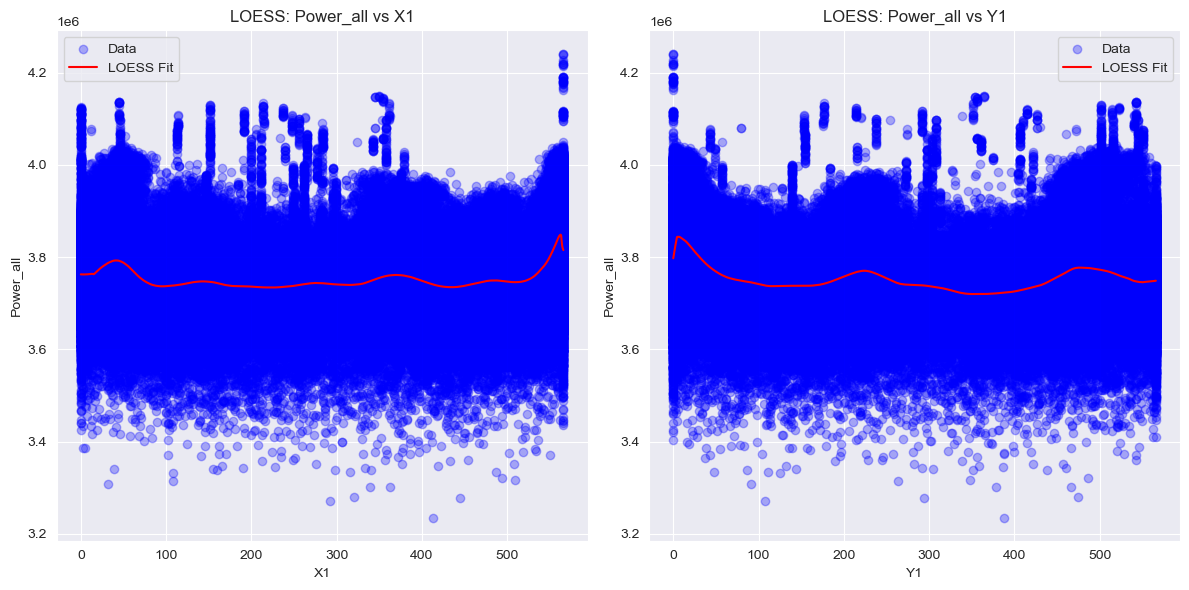

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Wczytaj dane z pliku CSV


# Sprawdź kolumny w danych
print(tasmania_df.columns)

# Wybór interesujących zmiennych
x = tasmania_df['X1']  # Zmienna X1
y = tasmania_df['Y1']  # Zmienna Y1
power_all = tasmania_df['Power_all']  # Zmienna Power_all

# Regresja lokalna (LOESS) dla Power_all vs X1
loess_x = lowess(power_all, x, frac=0.1)

# Regresja lokalna (LOESS) dla Power_all vs Y1
loess_y = lowess(power_all, y, frac=0.1)

# Wykresy wyników LOESS
plt.figure(figsize=(12, 6))

# LOESS: Power_all vs X1
plt.subplot(1, 2, 1)
plt.scatter(x, power_all, alpha=0.3, label='Data', color='blue')
plt.plot(loess_x[:, 0], loess_x[:, 1], color='red', label='LOESS Fit')
plt.title('LOESS: Power_all vs X1')
plt.xlabel('X1')
plt.ylabel('Power_all')
plt.legend()

# LOESS: Power_all vs Y1
plt.subplot(1, 2, 2)
plt.scatter(y, power_all, alpha=0.3, label='Data', color='blue')
plt.plot(loess_y[:, 0], loess_y[:, 1], color='red', label='LOESS Fit')
plt.title('LOESS: Power_all vs Y1')
plt.xlabel('Y1')
plt.ylabel('Power_all')
plt.legend()

plt.tight_layout()
plt.show()
